In [1]:
%matplotlib inline

# Question 1

(1)	\[2 marks\] Load data from `E001.csv`, which contains the coordinates of 7 points (see Figure 1) from row 2 to row 8. Note that it is not accepted if you type these values manually in your program.

(2)	\[2 marks\] Plot a scatter plot, y (vertical) vs x (horizontal), using circles as the marker.

(3) \[2 marks\] Draw the straight line of best fit in the same plot.

(4)	\[2 marks\] Use 30 equally spaced points to draw the quadratic polynomial of best fit in the same plot. 

(5)	\[2 marks\] Label the x axis and the y axis, respectively, using “x” and “y”. Add title “Seven Points” to the graph.

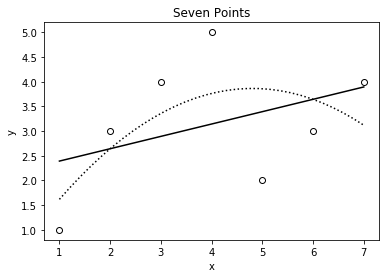

In [2]:
%reset -f
#(0)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#(1)
df=pd.read_csv('E001.csv')
#(2)
plt.plot(df.x,df.y,'ko',mfc='none')
#(3)
p01=np.polyfit(df.x, df.y, 1)
x0=df.x.sort_values(ascending=True)
#x0=[df.x.min(), df.x.max()]
plt.plot(x0, np.polyval(p01, x0), 'k-')
#(4)
p02=np.polyfit(df.x, df.y, 2)
x1=np.linspace(df.x.min(), df.x.max(), 30)
plt.plot(x1, np.polyval(p02, x1), 'k:')
#(5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Seven Points')
plt.show()

# Question 2

(1)	\[2 marks\] Specify the seed number for the random number generator as `123456`.

(2)	\[2 marks\] **Use one command** to generate a 4-by-8 matrix by appending a 4-by-4 matrix of uniformly distributed random numbers to a 4-by-4 matrix of random numbers of standard normal distribution. Name the 4-by-8 matrix as `x`.

(3)	\[2 marks\] **Use one command** to update the second row of `x` by adding 2 times the elements in its first row to the square of the elements in its third row, element by element.

(4)	\[2 marks\] **Use one command** to calculate the sum of each column and sort the sums from highest to lowest. Save and name the sorted sums as `s`.

(5)	\[2 marks\] **Use one command** to find the second smallest sum in `s` and name the scalar as `Q02`.

In [3]:
%reset -f
#(0)
#import matplotlib.pyplot as plt
#import pandas as pd
import numpy as np
#(1)
np.random.seed(123456)
#(2)
x=np.append(np.random.rand(4,4),np.random.randn(4,4), axis=1)
#x=np.concatenate((np.random.rand(4,4),np.random.randn(4,4)), axis=1)
#(3)
x[1,:]=2*x[0,:]+x[2,:]**2
#(4)
s=np.sort(np.sum(x, axis=0))[::-1]
#(5)
Q02=s[-2]
#(**)
Q02

-1.4167030442560717

# Question 3

(1)	Write a function to compute the European call option price using the following Black-Scholes formula:

$$
V=S\cdot \Phi(d_1)-K \cdot e^{-rT} \cdot \Phi(d_2)
$$

where $\Phi(x)$ represents the standard normal cumulative distribution function, and

$$ d_1=
\frac{1}{\sigma \sqrt{T}} 
\left[ \ln \left( \frac{S}{K} \right) + 
\left( r+\frac{\sigma^2}{2} \right) T \right]
\mbox{ and }
d_2=d_1 -\sigma \sqrt{T}.
$$

Inputs to the function should be $S$, $K$, $r$, $T$ and $\sigma$ and the output should be the value of $V$. Name this function as `Q03fun`.


(2)	Given $V=13.7$, $S=100$, $K=95$, $r=0.1$, $T=0.25$, **use the function defined in (1) and a library function for equation solving to find the implied volatility**, i.e. the value of $\sigma$ in the Black-Scholes formula. Name the value of $\sigma$ as `Q03sigma`.

In [4]:
#(0)
%reset -f
import numpy as np
import scipy.stats as ss
import scipy.optimize as so

#(1)
def Q03fun(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
#(2)
V=13.7
S=100
K=95
r=0.1
T=0.25
Q03sigma=so.fsolve(lambda x: Q03fun(S, K, r, x, T)-V, 0.5)[0]
Q03sigma

0.5002599582915369

# Question 4

Solve the following optimization problem with constraints.

$$
\begin{array}{l}
\mbox{Miminize } 3x^2+4xy+y^2+x+6y-2 \\
\mbox{Subject to} \\
2x+3y\ge 4 \\
x\ge 0 \\
y\ge 0
\end{array}
$$

Use the library function `scipy.optimize.minimize`. Name the minimum value as `Q04min`, and the corresponding values of `x` and `y`, respectively, as `Q04x` and `Q04y`.

In [5]:
%reset -f
import numpy as np
import scipy.optimize as so
fun=lambda x: 3*x[0]**2+4*x[0]*x[1]+x[1]**2+x[0]+6*x[1]-2
cons=({'type': 'ineq', 'fun': lambda x: 2*x[0]+3*x[1]-4},)
bnds=((0, None), (0, None))
res=so.minimize(fun, (1, 1), bounds=bnds, constraints=cons)
Q04min=res.fun
Q04x, Q04y=res.x
Q04min, Q04x, Q04y

(7.7777777777804005, 1.580957587066223e-13, 1.3333333333335204)

# Question 5

***
Write a Python function, `myLSMput`, to implement the following algorithm.
***

- **Input:** $K$ (a positive number), $r$ (a positive number), $\Delta t$ (a positive number) and $S$ (an $M$-by-$N$ matrix) denoted as the following.

$$
S=
\begin{pmatrix}
S_{1,1} & S_{1,2} & \cdots & S_{1,N} \\
S_{2,1} & S_{2,2} & \cdots & S_{2,N} \\
\vdots  & \vdots  & \cdots & \vdots  \\
S_{M,1} & S_{M,2} & \cdots & S_{M,N} \\
\end{pmatrix}
$$

- **Output:** $V$ (a number)

<u> `Algorithm` </u>

(1) **Use one command** to create an $M$-element vector, $x=(x_1, x_2 , \ldots, x_M)$. Initialize this vector as a constant vector with every element equal to $N$.

(2) **Use one command** to create an $M$-by-$N$ matrix, $IV$, as the following:

$$
IV=
\begin{pmatrix}
IV_{1,1} & IV_{1,2} & \cdots & IV_{1,N} \\
IV_{2,1} & IV_{2,2} & \cdots & IV_{2,N} \\
\vdots   & \vdots   & \cdots & \vdots  \\
IV_{M,1} & IV_{M,2} & \cdots & IV_{M,N} \\
\end{pmatrix}
$$


where $IV_{i,j}=\max(K-S_{i,j}, 0)$, for $i=1, 2, \ldots, M$, $j=1, 2, \ldots, N$.

(3) Repeat (3.1)-(3.4) for $j=N-1, N-2, \ldots, 2$.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(3.1) Let $idx$ denote the set of row numbers in the $j$-th column of $S$:

$$
idx=\{i:IV_{i,j}>0,i \in \{1,2,\ldots,M\}\}
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We denote the corresponding set of values in the $j$-th column of matrix $IV$ as $IV_{idx,j}$.

    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(3.2) Let $X$ be the set of values in the $j$-th column of $S$: 
$X=\{S_{i,j}: i \in idx\}$. Let $Y$ be the corresponding values in $IV$: 
$Y=\{IV_{i,x_i} e^{-(r)(x_i-j)(\Delta t)}: i \in idx\}$.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(3.3) Regress $Y$ on a constant, $X$ and $X^2$, (i.e. a degree-2 polynomial regression), 
we denote the result as: $P_2 (x)=a_2 x^2+a_1 x+a_0$. 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(3.4) For $i\in idx$, if $IV_{i,j} \gt P_2 (S_{i,j})$, let $x_i=j$.
    
(4) **Use one command** to calculate and return the value $V$: 

$$
V=\frac{1}{M}\sum_{i=1}^{M} IV_{i,x_i}e^{-(r)(x_i)(\Delta t)}
$$

In [9]:
#(0)
%reset -f
import numpy as np
def myLSMput(K, r, dt, S): #Input: K, r, dt, S
    M,N=S.shape
    #(1)
    x=(np.ones(M)*N).astype(int)
    #(2)
    IV=np.maximum(K-S,0)
    #(3)
    for j in range(N-1, 2-1, -1):
        #(3.1)
        idx=np.arange(1,M+1)[IV[:,j-1]>0] #np.arange(int, int) -> int type
        #(3.2)
        X=S[idx-1, j-1]
        Y=IV[idx-1,x[idx-1]-1]*np.exp(-r*(x[idx-1]-j)*dt)
        #(3.3)
        P=np.polyfit(X,Y,2)
        #(3.4)
        for i in idx:
            if IV[i-1,j-1]>np.polyval(P,S[i-1,j-1]):
                x[i-1]=j
    #(4)
    V=np.mean(IV[range(M),x-1]*np.exp(-r*(x-1)*dt))
    return V  #Output: V

In [8]:
K=1.1
r=0.06
dt=1
S=np.array([[1,   1.09,   1.08,   1.34],
            [1,   1.16,   1.26,   1.54],
            [1,   1.22,   1.07,   1.03],
            [1,   0.93,   0.97,   0.92],
            [1,   1.11,   1.56,   1.52],
            [1,   0.76,   0.77,   0.90],
            [1,   0.92,   0.84,   1.01],
            [1,   0.88,   1.22,   1.34]])
myLSMput(K, r, dt, S)

0.11443433004505696

# Question 6
***
Write a Python function, `my_MCScall_stat`, to implement the following algorithm.
***

- **Input:** $S$ (a positive number), $K$ (a positive number), $r$ (a positive number), $T$ (a positive number), 
$\sigma$ (a positive number) and $N$ (a positive even integer).

- **Output:** $V$ (a number)

<u> `Algorithm` </u>

(1) **Use one command** to create a vector of $N/2$ random numbers with standard normal distribution, denoted as $d$: 

$$
d=\left( d_1, d_2, \ldots, d_{N/2} \right)
$$

(2) **Use one command** and the library function `numpy.concatenate` to create a vector of $N$ elements by 
using $d$ as the first half, and $-d$ as the second half. Name this vector as $p$.

$$
p=\left(p_1, p_2, \ldots, p_N \right) 
= \left(d_1, d_2, \ldots, d_{N/2}, -d_1, -d_2, \ldots, -d_{N/2} \right)
$$

(3)	**Use one command** to compute the mean and standard deviation of 
the $N$ numbers in the vector $p$, and denote them as $\mu_p$ and $\sigma_p$, respectively.
    
(4) **Use one command** to update every element in the vector $p$ as follows: 

$$
p_i \leftarrow \frac{p_i-\mu_p}{\sigma_p} \mbox{ for } i=1, 2, \ldots, N.
$$

(5) **Use one command** to obtain the vector $Y=(Y_1, Y_2, \ldots, Y_N)$ computed as follows:

$$
Y_i=S \cdot e^{\left( r- \frac{\sigma^2}{2} \right) T+ \sigma \cdot \sqrt{T} \cdot p_i } \mbox{ for } i=1, 2, \ldots, N.
$$

(6) **Use one command** to obtain the vector $h=(h_1, h_2, \ldots, h_N)$ computed as follows:

$$
h_i=\max⁡(Y_i-K, 0) \mbox{ for } i=1, 2, \ldots, N.
$$

(7)	**Use one command** to calculate and return $V$ as follows:

$$
V=\frac{1}{N} e^{-r \cdot T} \sum_{i=1}^{N} h_i
$$

In [8]:
%reset -f
import numpy as np
def my_MCScall_stat(S, K, r, T, sigma, N):
    #(1)
    d=np.random.standard_normal(N//2)
    #(2)
    p=np.concatenate((d, -d))
    #(3)
    mp, sp=p.mean(), p.std()
    #(4)
    p=(p-mp)/sp
    #(5)
    Y = S * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * np.sqrt(T) * p)
    #(6)
    h = np.maximum(Y - K, 0)
    #(7)
    V = np.exp(-r * T) * np.sum(h) / N
    return V

S = 100.
K = 105.
r = 0.05
T = 1.0
sigma = 0.25
N = 50000
my_MCScall_stat(S, K, r, T, sigma, N)

10.02008283630408

# Question 7

***
Write a Python program according to the following instructions.
***

(1) **Use one command with** `pandas.read_csv` to load data from the CSV file `Q7.csv` to a DataFrame, using the 
**first column as the row labels** and the **first row as column names**. Name this DataFrame 
as `df1`.

![title](img/Q7csv.png)

(2) **Use one command** to find and `print` the number of rows and number of columns of the DataFrame `df1` as `10 rows, 5 columns`, if there are 10 rows and 5 columns.

(3)	**Use one command with** `pandas.DataFrame.drop` to drop those rows in `df1` which have a smaller value in column `C` than the value in column `D`.
    
(4) **Use one command** to add a column to the DataFrame `df1` and initialize the column’s values as consecutive integers starting from -5 (i.e., -5, -4, -3, …). Name this column as `G`.

(5) **Use one command** to replace the column `D` of `df1` by its rolling mean of 3 using `pandas.DataFrame.rolling`. 

(6) **Use one command with** `pandas.DataFrame.eval` to update the **odd rows** in column `E` using **(column E)=(column C)+(column F)\*(column B)**.

(7) **Use one command with** `pandas.DataFrame.apply` to update the **even rows** of column `E` using elements in the same row: **(column E)=(column C)+(column F)-(column B)**.

(8) **Use one command with** `pandas.DataFrame.where` to update `df1` by changing all negative numbers in the DataFrame to **twice** of their original values.

(9) **Use one command with** `pandas.DataFrame.plot` to plot columns `B`, `E`, `F` and `G` in `df1`, respectively using **black solid line**, **blue dashed line**, **red dotted line** and **green dash-dot line**, followed by the command `plt.show()`.

(10) Write the DataFrame `df1` to a CSV file, `Q7result.csv`.

10 rows, 5 columns


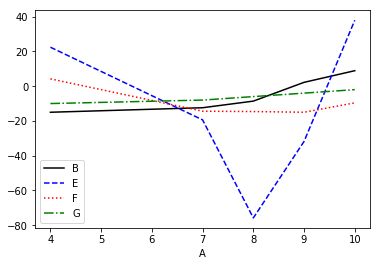

In [9]:
#(0)
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#(1)
df1=pd.read_csv('Q7.csv', index_col=0)
#(2)
print("%d rows, %d columns" % df1.shape)
#(3)
df1.drop(df1.index[df1.C>df1.D], inplace=True)
#(4)
df1['G']=range(-5,-5+df1.shape[0])
#(5)
df1['D']=df1[['D']].rolling(3).mean()
#(6)
df1.iloc[::2,:].eval('E=C-F*B', inplace=True)
#(7)
df1.loc[df1.index[1::2],'E']=df1.apply(
    lambda row: row['C']+row['F']-row['B'], 
    axis=1)
#(8)
df1.where(df1>0, 2*df1, inplace=True)
#(9)
df1[['B','E','F','G']].plot(
    style=['k-','b--','r:','g-.'])
plt.show()
#(10)
df1.to_csv('Q7result.csv')